In [1]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/Recommended-system/Untitled_Message/ratings_Electronics.csv')

In [3]:
df.shape

(1048575, 4)

### There are four columns, In this userID have numbers and characters another 3 columns have numbers only

In [4]:
df.head()

,userID,productID,rating,timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [5]:
df.tail()

,userID,productID,rating,timestamp
1048570,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048571,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048572,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048573,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800
1048574,A1G9Q5UJ5Y7DES,B000IF51UQ,2,1390780800


In [6]:
df.columns

Index(['userID', 'productID', 'rating', 'timestamp'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
userID       1048575 non-null object
productID    1048575 non-null object
rating       1048575 non-null int64
timestamp    1048575 non-null int64
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [8]:
df.describe()

,rating,timestamp
count,1.048575e+06,1.048575e+06
mean,3.973379e+00,1.248822e+09
std,1.399329e+00,1.091615e+08
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.169078e+09
50%,5.000000e+00,1.250035e+09
75%,5.000000e+00,1.355789e+09
max,5.000000e+00,1.406074e+09


In [9]:
rows, columns = df.shape
print('No of rows: ', rows)
print('No of columns: ', columns)

No of rows:  1048575
No of columns:  4


In [10]:
df.ftypes

userID       object:dense
productID    object:dense
rating        int64:dense
timestamp     int64:dense
dtype: object

### Drop the timestamp column in this dataset

In [11]:
df.drop('timestamp', axis=1, inplace=True)

In [12]:
df.isnull().values.any()

False

### In some cases, we find how many missing values exist in the dataset, 

#### In this case there is no null values

In [13]:
df.isnull().sum()

userID       0
productID    0
rating       0
dtype: int64

In [14]:
print('Number of Missing Values across column \n', df.isnull().sum())

Number of Missing Values across column 
 userID       0
productID    0
rating       0
dtype: int64


In [15]:
df['rating'].describe().transpose()

count    1.048575e+06
mean     3.973379e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Get the row of max value

In [16]:
df.loc[df['rating'].idxmax()]

userID       A2CX7LUOHB2NDG
productID         321732944
rating                    5
Name: 0, dtype: object

### Get the row of minimum value

In [17]:
df.loc[df['rating'].idxmin()]

userID       A2NWSAGRHCP8N5
productID         439886341
rating                    1
Name: 1, dtype: object

### Check the distribution of the rating

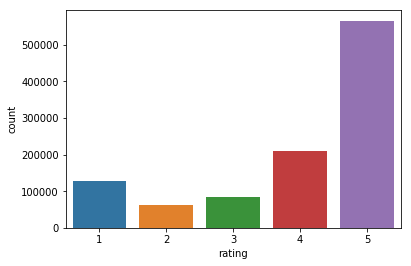

In [18]:
ax = sns.countplot(x='rating', data=df)

### Number of unique user id and product id in the dataset

In [19]:
print('Number of unique USERS in Raw data = ', df['userID'].nunique())
print('Number of unique ITEMS in Raw data = ', df['productID'].nunique())

Number of unique USERS in Raw data =  786329
Number of unique ITEMS in Raw data =  61893


### Top 10 users based on rating

In [20]:
most_rated = df.groupby('userID').size().sort_values(ascending=False)[:10]
most_rated

userID
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
dtype: int64

### Data Model Preparation as per requirement on number of Minimum Ratings

In [21]:
counts = df['userID'].value_counts()

In [22]:
counts = df['userID'].value_counts()
df_final = df[df['userID'].isin(counts[counts >= 12].index)]

In [23]:
df_final.shape

(28389, 3)

In [24]:
df_final

,userID,productID,rating
117,AT09WGFUM934H,594481813,3
177,A17HMM1M7T9PJ1,970407998,4
388,A6J8D9V5S9MBE,972683275,5
630,A3TAS1AG6FMBQW,972683275,5
1044,ABU4LUKJU2QOY,972683275,5
1137,A25RTRAPQAJBDJ,972683275,5
1309,A3LDPF5FMB782Z,1400501466,5
1321,A1A5KUIIIHFF4U,1400501466,1
1450,AW3LX47IHPFRL,1400501466,5
1484,A19N3S7CBSU6O7,1400501466,5


In [25]:
print('Number of users who have rated 12 or more items =', len(df_final))
print('Number of unique USERS in final data = ', df_final['userID'].nunique())
print('Number of unique ITEMS in final data = ', df_final['productID'].nunique())

Number of users who have rated 12 or more items = 28389
Number of unique USERS in final data =  1456
Number of unique ITEMS in final data =  13395


### Calculate the Density of the Ratings Matrix

In [26]:
final_ratings_matrix = df_final.pivot(index = 'userID', columns = 'productID', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (1456, 13395)


In [27]:
final_ratings_matrix.head()

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000IELOY4,B000IEN8QQ,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF4G2A,B000IF4TPY,B000IF51UQ
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1053TBGTIEQ8V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *=100

given_num_of_ratings =  28389
possible_num_of_ratings =  19503120


In [29]:
print('density: {:4.2f}%'.format(density))

density: 0.15%


### Matrix with one row "product" and one column per user for Item-based CF

In [30]:
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userID,A100UD67AHFODS,A100WO06OQR8BQ,A101OAAMZYWQ3U,A1053TBGTIEQ8V,A105TOJ6LTVMBG,A109LWN9DUGPDP,A10ARISO1UMIUN,A10C84Y38RT22P,A10KFV763ZTT0T,A10KZY39SVHUXD,...,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZA595ZPIG240,AZAC8O310IK4E,AZBXKUH4AIW3X,AZFM7IM6ZEX2T,AZMY6E8B52L2T,AZOK5STV85FBJ,AZYJE40XW6MFG,AZZ2DEE2NTIM7
productID,,,,,,,,,,,,,,,,,,,,,
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build Popularity Recommender Model (Non - Personalised)

## Recommendation Based on Average Ratings of the productid

In [31]:
final_ratings_matrix.mean(axis=0).sort_values(ascending=False)[:10]

productID
B00007E7JU    0.226648
B0002L5R78    0.198489
B00004ZCJE    0.177198
B0000BZL1P    0.165522
B00007KDVI    0.162775
B00009XVCZ    0.140110
B00005LEN4    0.137363
B0002CPBWI    0.135302
B00004SB92    0.131868
B00009R6TA    0.129121
dtype: float64

## Recommendation Based on Number of users Visited

In [32]:
df_final['productID'].value_counts()[:10]

B00007E7JU    73
B00004ZCJE    65
B0002L5R78    62
B00007KDVI    60
B0000BZL1P    49
B00009XVCZ    46
B0002CPBWI    45
B00009R6TA    44
B00004SB92    43
B000FBK3QK    42
Name: productID, dtype: int64

# Build Collaborative Filtering Model

## Model-Based Collaborative Filtering : Singular Value Decomposition

In [33]:
pivot_df=pd.concat([final_ratings_matrix], axis=1)
print(pivot_df)

productID       1400501466  1400501520  1400501776  1400532620  1400532655  \
userID                                                                       
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A101OAAMZYWQ3U         0.0         0.0         0.0         0.0         0.0   
A1053TBGTIEQ8V         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         0.0         0.0         0.0         0.0         0.0   
A109LWN9DUGPDP         0.0         0.0         0.0         0.0         0.0   
A10ARISO1UMIUN         0.0         0.0         0.0         0.0         0.0   
A10C84Y38RT22P         0.0         0.0         0.0         0.0         0.0   
A10KFV763ZTT0T         0.0         0.0         0.0         0.0         0.0   
A10KZY39SVHUXD         0.0         0.0         0.0         0.0         0.0   
A10O7THJ2O20AG         0.0         0.0         0.0         0.0  

#### Pivot Table is a Similar Operation that is Commonly seen the Programs that Operate on Tabular Data. In this 1456 Rows and 13396 Columns are Segregation Table.

### Actual Ratings Given by users

In [34]:
final_ratings_matrix .head() 

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000IELOY4,B000IEN8QQ,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF4G2A,B000IF4TPY,B000IF51UQ
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1053TBGTIEQ8V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD - Singular Value Decomposition Method

In [35]:
from scipy.sparse.linalg import svds

In [36]:
U, sigma, Vt = svds(final_ratings_matrix, k = 10)

### Construct Diagonal Array in SVD

In [37]:
sigma = np.diag(sigma)

In [38]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

## Predicted Ratings

In [39]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = final_ratings_matrix.columns)
preds_df.head()

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000IELOY4,B000IEN8QQ,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF4G2A,B000IF4TPY,B000IF51UQ
0,0.002605,0.000955,0.005103,0.001834,0.016121,0.001044,0.002184,0.000764,0.004585,0.004010,...,0.000636,0.000510,0.002180,0.001147,0.001072,0.001304,0.026356,0.004738,0.001941,0.013214
1,0.004805,0.001533,0.012017,0.003535,0.027362,0.001844,0.005250,0.001227,0.007758,0.006444,...,0.002241,0.000539,0.002402,0.001799,0.001518,0.004238,0.037517,0.009901,0.004491,0.028919
2,0.003196,0.000605,-0.001344,0.001579,0.004138,0.000145,0.001063,0.000484,0.004993,0.003878,...,0.000969,0.000628,0.002652,0.001631,0.001103,-0.002142,0.009259,-0.002601,0.000635,0.003449
3,0.000783,0.000211,0.001084,0.000531,0.004539,0.000201,0.000678,0.000169,0.001250,0.001047,...,0.000201,0.000103,0.000702,0.000350,0.000264,0.000341,0.004320,0.000815,0.000491,0.003198
4,0.002463,0.000750,0.008183,0.001998,0.017414,0.001049,0.003021,0.000600,0.003932,0.002917,...,0.001617,0.000118,-0.000213,0.000836,0.000638,0.002797,0.016158,0.006317,0.002810,0.018634


## Recommended the Items with the Highest Predicted Ratings

In [40]:
def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):         
   user_idx = userID-1
   sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
   sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
   temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
   temp.index.name = 'Recommend Items'
   temp.columns = ['user_ratings', 'user_predictions']
    
   temp = temp.loc[temp.user_ratings == 0]
   temp = temp.sort_values('user_predictions', ascending=False)
   print('\nBelow are the recommended items for the user(user_id = {}):\n'. format(userID))
   print(temp.head(num_recomendations))

### Actual Ratings Given by Users

In [41]:
final_ratings_matrix.head()

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000IELOY4,B000IEN8QQ,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF4G2A,B000IF4TPY,B000IF51UQ
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1053TBGTIEQ8V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Average Actual Rating for Each Item

In [42]:
final_ratings_matrix.mean().head()

productID
1400501466    0.010989
1400501520    0.003434
1400501776    0.006181
1400532620    0.004121
1400532655    0.019231
dtype: float64

## Predicted Ratings

In [43]:
preds_df.head()

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000IELOY4,B000IEN8QQ,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF4G2A,B000IF4TPY,B000IF51UQ
0,0.002605,0.000955,0.005103,0.001834,0.016121,0.001044,0.002184,0.000764,0.004585,0.004010,...,0.000636,0.000510,0.002180,0.001147,0.001072,0.001304,0.026356,0.004738,0.001941,0.013214
1,0.004805,0.001533,0.012017,0.003535,0.027362,0.001844,0.005250,0.001227,0.007758,0.006444,...,0.002241,0.000539,0.002402,0.001799,0.001518,0.004238,0.037517,0.009901,0.004491,0.028919
2,0.003196,0.000605,-0.001344,0.001579,0.004138,0.000145,0.001063,0.000484,0.004993,0.003878,...,0.000969,0.000628,0.002652,0.001631,0.001103,-0.002142,0.009259,-0.002601,0.000635,0.003449
3,0.000783,0.000211,0.001084,0.000531,0.004539,0.000201,0.000678,0.000169,0.001250,0.001047,...,0.000201,0.000103,0.000702,0.000350,0.000264,0.000341,0.004320,0.000815,0.000491,0.003198
4,0.002463,0.000750,0.008183,0.001998,0.017414,0.001049,0.003021,0.000600,0.003932,0.002917,...,0.001617,0.000118,-0.000213,0.000836,0.000638,0.002797,0.016158,0.006317,0.002810,0.018634


### Average Predicted Rating for Each Item

In [44]:
preds_df.mean().head()

productID
1400501466    0.001817
1400501520    0.000658
1400501776    0.002556
1400532620    0.000994
1400532655    0.008358
dtype: float64

In [45]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)                            
rmse_df.head()

(13395, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productID,,,
1400501466,0.010989,0.001817,0
1400501520,0.003434,0.000658,1
1400501776,0.006181,0.002556,2
1400532620,0.004121,0.000994,3
1400532655,0.019231,0.008358,4


In [46]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00444 



# Overall Observations:

##### - Import Required Library,
##### - There are four columns, In this userID have numbers and characters another 3 columns have numbers only,
##### - Drop the timestamp column in this dataset,
##### - In some cases, we find how many missing values exist in the dataset, ,
##### - In this case there is no null values,
##### - Get the row of max value,
##### - Get the row of minimum value,
##### - Check the distribution of the rating,
##### - Number of unique user id and product id in the dataset,
##### - Top 10 users based on rating,
##### - Data Model Preparation as per requirement on number of minimum ratings,
##### - Calculate the density of the ratings matrix,
##### - Matrix with one row "product" and one column per user for Item-based CF,
##### - Build popularity Recommender model.(non-personalised),
##### - Recommendation based on average ratings of the productid,
##### - Recommendation based on the number of users visited the place,
##### - Build Collaborative Filtering Model,
##### - Model-Based Collaborative Filtering:Singular Value Decomposition,
##### - Actual ratings given by users,
##### - SVD Method,
##### - Singular Value Decomposition,
##### - Construct diagonal array in SVD,
##### - Predicted ratings,
##### - Recommended the items with the highest predicted ratings,
##### - Index starts at 0,
##### - Get and sort the users ratings,
##### - Sorted_user_ratings,
##### - Sorted_user_predictions,
##### - Enter the "userID" and "num_recommendation" for user,
##### - Actual ratings given by users,
##### - Average actual rating for each item,
##### - Predicted Ratings,
##### - Average Predicted rating for each item,

# Summarise the Project Insights:

##### 1. The diversity of applications and the multidisciplinary recommended system, scientific understanding lags technology. 
##### 2. This report highlights of build popularity recommended model and Collaborative Filtering model. 
##### 3. These two models are primary role in this recommendation based system project.
##### 4. There is nothing missing values in this dataset, then minumum rating is 1 and maximum rating is 5.
##### 5. Number of unique user based the dataset is 786329 and number of unique item based the dataset is 61893.
##### 6. The final rating matrix has 5 rows and 13395 column, Actual ratings for each item arithmetic mean() is expectation or average is the    central value of a discrete set of numbers, the sum of the values divided by the number of values.
##### 7. RMSE - Root-Mean-Square Error is a frequently used measure of the differences between values predicted by a model  0.00444 .

# My Perspective of Recommendation System:

#### * Customer's want to invest their money and efforts into very best prospects.
#### * Thing is finding the great prospects is to find people who are just like the people who are already proven to be consistent buyers have to accept it.
#### * I found new lists in this project to that have similar characteristics.
#### * Information customer's need to identify their best prospects and prepare the most effective message that will reach them and appeal to them.